In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Github
%cd 'soil-physics-theory'
%cd 'content/chapter-4'

Mounted at /content/drive
/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/soil-physics-theory
/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-4


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PSP_heat import *
from PSP_thermalCond import *
from PSP_soil import *
from math import *

Q no. 4.1 . Use the function thermal Conductivity to investigate the temperature dependence of thermal conductivity. At what temperature is the thermal conductivity of wet soil independent of water content? Explain why the temperature dependence of conductivity disappears at this temperature.

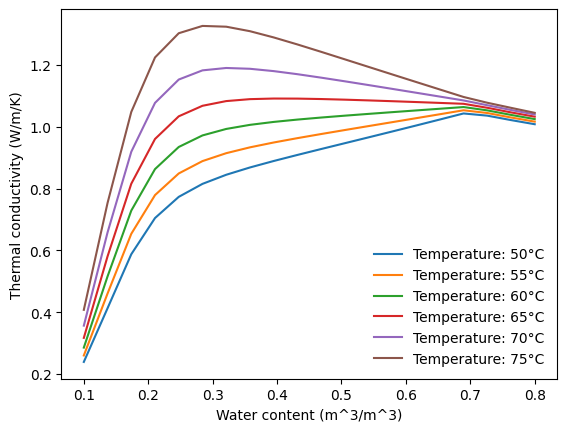

In [29]:
from PSP_heatSoil import thermalConductivity
bulkDensity = 800  # kg/m^3
clay = 0.30  # clay content of soil (g/g)
waterContents = np.linspace(0.1, 0.8, 20)  # Vary water content from 30% to 50%
temperatures = range(50, 80, 5)  # Temperature range from 60°C to 100°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water content (m^3/m^3)')
plt.ylabel('Thermal conductivity (W/m/K)')
plt.legend(fontsize='8')
plt.legend(frameon=False)
plt.grid(False)
plt.show()

The dependence of thermal conductivity on water content for five
different temperatures, generated using a bulk density of 1100 kg m–3 and a clay content
of 0.3. At about 65 C, the apparent thermal conductivity from latent heat transport is equal to the thermal conductivity of water, so increasing water content does not affect the soil conductivity, at water content above 0.3 m^3 m^-3.


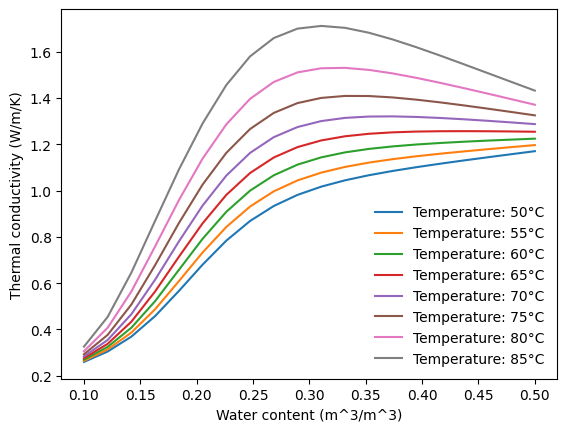

In [46]:
from PSP_heatSoil import thermalConductivity
bulkDensity = 1100  # kg/m^3
clay = 0.5  # clay content of soil (g/g)
waterContents = np.linspace(0.1, 0.5, 20)  # Vary water content from 30% to 50%
temperatures = range(50, 90, 5)  # Temperature range from 60°C to 100°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water content (m^3/m^3)')
plt.ylabel('Thermal conductivity (W/m/K)')
plt.legend(fontsize='8')
plt.legend(frameon=False)
plt.grid(False)
plt.show()

Q. no. 4.2 What is the possible range of volumetric specific heat in mineral soils?


In [47]:
from PSP_heatSoil import heatCapacity
bulkDensity = 950 # kg m^-3
waterContent = 0.00 # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The minimum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The minimum heat capacity is approximately 0.860 MJ/m^3/K.


The minimum value will occur when bulk density and soil water content are at their minimum values, which for mineral soils could be a bulk density of 950 kg m −3  and soil water content of 0.00 m 3  m −3 .

In [48]:
bulkDensity = 950 # kg m^-3
porosity = 1 - bulkDensity/2650 # m^3 m^-3
waterContent = porosity # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The maximum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The maximum heat capacity is approximately 3.542 MJ/m^3/K.


The maximum value will occur when bulk density is minimum and soil water content is maximum, which for mineral soils could be a bulk density of 950 kg m −3  and soil water content equal to the porosity.

Q. no. 4.3 Use the program to predict soil temperature as a function of time and depth.What effect would a surface residue mulch have on soil temperature? At what depth are
temperature changes 180 degrees out of phase with the surface temperature?


1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.3
mean temperature [C]: 25
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


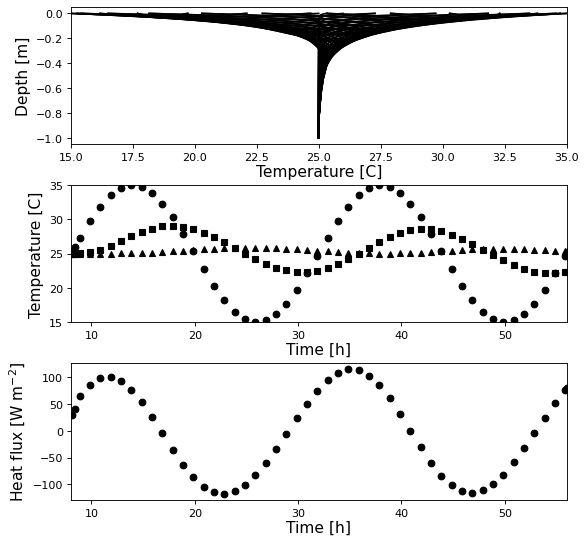

In [49]:
from main2 import main
bulkDensity = 1000. # kg/m3
clay = 0.00 # g/g
main(bulkDensity, clay)